!!! Важное замечание, что на практике без уточнения точного результата и постановки задачи в работу такую задачу не взял бы. На практике в зависимости от задачи выбирается подходящая модель, а также при подведении итогов проще работать с ожиданиями заказчика.

В связи с этим определил цель: Определение конкретного сотрудника исходя из наименования репозитория и количества дефектов (в случае наилчия ментора взял бы в как основной параметр для прогноза - количество дефектов, а фичи - репа, дата, автор. комментарии в конце ноутбука) 

# 1. Загрузка библиотек

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# 2. Загрузка файла

In [195]:
#Нужно убедиться, что адрес файла указан корректно

In [100]:
df = pd.read_csv(filepath_or_buffer = "../тестовое задание/АВСОФТ_тест_ML_приложение.csv",
           sep = ',')

# 3. Получение изучающей информации о генеральной совокупности 

In [101]:
df.describe()

,bugs
count,319.000000
mean,2.996865
std,1.855636
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repository_name  319 non-null    object
 1   commit_hash      319 non-null    object
 2   commit_date      319 non-null    object
 3   commit_author    319 non-null    object
 4   commit_message   319 non-null    object
 5   bugs             319 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 15.1+ KB


In [103]:
 df.nunique()

repository_name      6
commit_hash        319
commit_date        318
commit_author       10
commit_message     309
bugs                13
dtype: int64

In [104]:
df.head(20)

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
0,mlm,b28abb42,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,438b5c4d,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,8e6e4f31,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,5e0956a6,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,b9f4b40c,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7
5,mlm,4f5f3743,2020-06-11T09:12:37,Peggy,Добавлено больше логирования и фикс до частичн...,6
6,mlm,24a11c40,2020-06-10T15:34:22,Victor,"Отладка, чтоб оно хотябы запускалось",4
7,mlm,3287c74a,2020-06-10T15:34:04,Victor,Добавил скрипт для запуска контейнера,4
8,mlm,c78d5187,2020-06-10T15:22:21,Victor,label не нужен,2
9,mlm,bcb47e60,2020-06-10T14:54:14,Victor,Установка всех зависимостей теперь в докер файле,5


In [105]:
df.nsmallest(5, 'bugs').head(20)

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
42,standard,b904f026,2020-05-21T16:04:16,Wendy,oups fixed dist,0
93,conductor,5840de2f,2020-05-29T10:52:05,Wendy,little fix and clear,0
143,conductor,dc02cab8,2020-04-09T12:35:08,Mallory,Small fixes in image module to make it all work,0
162,conductor,4bb47f73,2020-04-01T13:34:04,Mallory,removed logstash and cowrie sed /data fix,0
201,dockers,2ac5f8a8,2020-06-02T13:35:06,Carol,"ciscoasa_v2: add logging, file.log -> file.jso...",0


In [106]:
df.nlargest(5, 'bugs').head(20)

,repository_name,commit_hash,commit_date,commit_author,commit_message,bugs
36,mlm,bb54e4e6,2020-03-08T17:23:12,Victor,Small Fixes in main.py to make it work,12
38,mlm,29ba5151,2020-03-08T17:18:35,Victor,Small Fixes in models.py to make it work,12
12,mlm,7358f296,2020-06-10T13:05:18,Victor,"Не сохранять неизвестные поля, на них нельзя о...",11
13,mlm,d00a4637,2020-06-10T12:51:30,Victor,"hdf5 не умеет хранить матрицы различных типов,...",10
35,mlm,af7c2776,2020-03-08T17:46:38,Victor,Saving unknown labels on emergency saving,9


# 4. Подготовка данных для обучения модели

In [107]:
df_copy = df.copy()
del df_copy['commit_hash']
df_copy

,repository_name,commit_date,commit_author,commit_message,bugs
0,mlm,2020-06-12T14:26:12,Victor,объяснения предсказаний с помощью lime,4
1,mlm,2020-06-12T11:53:10,Victor,Поставил lime вместо eli5,3
2,mlm,2020-06-11T15:19:03,Victor,Скрипт для создния пакетов обновления,4
3,mlm,2020-06-11T10:42:29,Victor,Сортировка весов по убыванию,3
4,mlm,2020-06-11T09:25:19,Victor,не надо конвертировать массив до операции по с...,7
...,...,...,...,...,...
314,sensor,2020-03-23T12:54:35,Dabe,setting hostname,1
315,sensor,2020-03-23T12:30:52,Dabe,heralding default dockerfile,2
316,sensor,2020-03-23T11:27:40,Dabe,unnesserity /data path permissions setting,3
317,sensor,2020-03-23T11:20:50,Dabe,added trapconductor,1


In [108]:
del df_copy['commit_message']
df_copy

,repository_name,commit_date,commit_author,bugs
0,mlm,2020-06-12T14:26:12,Victor,4
1,mlm,2020-06-12T11:53:10,Victor,3
2,mlm,2020-06-11T15:19:03,Victor,4
3,mlm,2020-06-11T10:42:29,Victor,3
4,mlm,2020-06-11T09:25:19,Victor,7
...,...,...,...,...
314,sensor,2020-03-23T12:54:35,Dabe,1
315,sensor,2020-03-23T12:30:52,Dabe,2
316,sensor,2020-03-23T11:27:40,Dabe,3
317,sensor,2020-03-23T11:20:50,Dabe,1


In [137]:
del df_copy['commit_date']
df_copy

,repository_name,commit_author,bugs
0,1,7,4
1,1,7,3
2,1,7,4
3,1,7,3
4,1,7,7
...,...,...,...
314,6,11,1
315,6,11,2
316,6,11,3
317,6,11,1


In [112]:
repa_dict = {'mlm' : 1, 'standard' : 2, 'agent' : 3, 'conductor' : 4, 'dockers' : 5, 'sensor' : 6}
df_copy['repository_name'] = df_copy['repository_name'].apply(lambda x: repa_dict[x])

In [115]:
user_dict = {'Victor' : 7, 'Wendy' : 8, 'Trudy' : 9, 'Mallory' : 10, 'Dabe' : 11, 'Carol' : 12, 'Bob' : 13, 'Alice' : 13, 'Eve' : 14, 'Peggy' : 15}
df_copy['commit_author'] = df_copy['commit_author'].apply(lambda x: user_dict[x])

In [140]:
df_copy.head(100) 

,repository_name,commit_author,bugs
0,1,7,4
1,1,7,3
2,1,7,4
3,1,7,3
4,1,7,7
...,...,...,...
95,4,8,1
96,4,7,9
97,4,7,4
98,4,7,8


# 5. Загрузка библиотеки с моделью и разбивка данных на обучающую и тестовую выборки

In [141]:
import sklearn

In [142]:
from sklearn.model_selection import train_test_split
X = df_copy
y = df_copy

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

In [144]:
X_train.head(10)

,repository_name,commit_author,bugs
210,5,7,1
76,3,7,4
94,4,8,4
222,6,8,2
311,6,14,1
258,6,7,4
316,6,11,3
78,3,7,3
308,6,10,3
239,6,7,1


In [145]:
X_train.shape

(255, 3)

In [161]:
y_train.head(10)

,repository_name,commit_author,bugs
210,5,7,1
76,3,7,4
94,4,8,4
222,6,8,2
311,6,14,1
258,6,7,4
316,6,11,3
78,3,7,3
308,6,10,3
239,6,7,1


In [147]:
X_test.shape

(64, 3)

In [148]:
Target_model = X_train['commit_author']
Target_model.head

<bound method NDFrame.head of 210     7
76      7
94      8
222     8
311    14
       ..
188    11
71      7
106     7
270     7
102     8
Name: commit_author, Length: 255, dtype: int64>

In [149]:
Target_model.shape

(255,)

In [150]:
X_train = X_train.drop('commit_author', axis=1)

In [151]:
X_train.head()

,repository_name,bugs
210,5,1
76,3,4
94,4,4
222,6,2
311,6,1


In [152]:
X_train.shape

(255, 2)

# 6. Загрузка моделей - линейная регрессия и случайный лес

In [153]:
from sklearn import linear_model
linear_regression_model = linear_model.LinearRegression()
linear_regression_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [154]:
from sklearn import ensemble
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# 7. Обучение моделей на основании тестовой выборки

In [155]:
random_forest_model.fit(X_train, Target_model)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [156]:
linear_regression_model.fit(X_train, Target_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
X_test.head(10)

,repository_name,commit_author,bugs
73,3,7,3
218,6,8,1
25,1,7,3
208,5,7,3
9,1,7,5
101,4,7,2
176,4,11,2
186,4,11,2
63,2,7,2
116,4,9,4


In [166]:
X_test.shape

(64, 3)

In [168]:
Test_Target_model = X_test['commit_author']
Test_Target_model.head

<bound method NDFrame.head of 73      7
218     8
25      7
208     7
9       7
       ..
220     8
209     7
109     8
93      8
124    10
Name: commit_author, Length: 64, dtype: int64>

In [169]:
Test_Target_model.shape

(64,)

In [170]:
X_test = X_test.drop('commit_author', axis=1)

In [171]:
X_test.head()

,repository_name,bugs
73,3,3
218,6,1
25,1,3
208,5,3
9,1,5


In [172]:
X_test.shape

(64, 2)

# 8. Предсказание после обучения 

In [173]:
test_predictions_linear = linear_regression_model.predict(X_test)

In [174]:
test_predictions_random_forest = random_forest_model.predict(X_test)

# 9. Визуализация данных

In [175]:
%matplotlib inline 

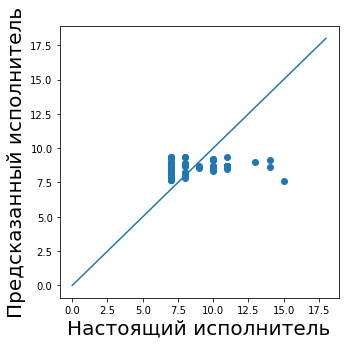

In [185]:
plt.figure(figsize=(5, 5))
plt.scatter(Test_Target_model, test_predictions_linear)
plt.plot([0, 6 * 3], [0, 6 * 3]) 
plt.xlabel('Настоящий исполнитель', fontsize=20)
plt.ylabel('Предсказанный исполнитель', fontsize=20);

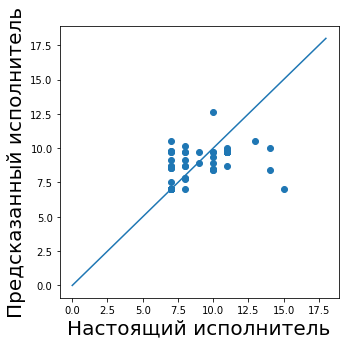

In [183]:
plt.figure(figsize=(5, 5))
plt.scatter(Test_Target_model, test_predictions_random_forest)
plt.plot([0, 6 * 3], [0, 6 * 3]) 
plt.xlabel('Настоящий исполнитель', fontsize=20)
plt.ylabel('Предсказанный исполнитель', fontsize=20);

# 10. Расчетметрик и определение наилучшей модели по итогам обучения и имеющихся данных

In [186]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [190]:
mean_absolute_error_linear_model = mean_absolute_error(Test_Target_model, test_predictions_linear) 
print(mean_absolute_error_linear_model)
mean_squared_error_linear_model = mean_squared_error(Test_Target_model, test_predictions_linear)
print(mean_squared_error_linear_model)

1.6862874579790332
4.357511588657343


In [191]:
mean_absolute_error_random_forest_model = mean_absolute_error(Test_Target_model, test_predictions_random_forest)
print(mean_absolute_error_random_forest_model)
mean_squared_error_random_forest_model = mean_squared_error(Test_Target_model, test_predictions_random_forest)
print(mean_squared_error_random_forest_model)

1.3551726725247373
3.709602334442352


# 11. Результат

In [ ]:
По итогам обучения и расчета MAE и MSE было выявлено, что модель случайного
лес наиболее подходящая так как разница между фактическими данными и предсказанными 
наименьшая в модели случайного леса

In [ ]:
# были идеи по преобразованию данных в столбце дата для увеличения фич при обучении -> не нашел подходящие методы
# была идея по кстомизации настроек в модели случайный лес -> вышло время на подготовку тестового задания. В целом пошел бы по пути поиска оптимального количества деревьев, листьев и тд. думаю можно было бы получить более точный прогноз
# была идея по генерации большего количества данных и приравнивании количества данных в классах. за класс взял бы репозитории. Судя по выборке классы не сбалансированы.

# удалил данные хэшам, так как уникальный идентификатор операции и модель врятли смогла бы определить закономерности
# удалил данные о комментариях пользователей, так как практически каждый комментарий уникальный

# думаю что после внедрения данной модели, ее нужно было бы актуализировать каждые 2 мес. с учетом обновления штата команды и возможной смены репозиториев

многие данные, умозаключения вычитаны, но пока не было практических задач для применения и собственных испытаний :) спасибо, что уделили время на чтение